## Lecture-02 From Dynamic Programming to Machine learning

## 动态规划

## ==> 怎么这么简单！你是不是讲错了！！
## ==> 不是，我没有讲错，动态规划本来就是很简单的内容

In [7]:
origianl_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 33] # 长度为1到11的价钱

In [8]:
len(origianl_price)

11

In [41]:
from collections import defaultdict

In [48]:
price = defaultdict(int)

In [49]:
for i, p in enumerate(origianl_price): price[i+1] = p

In [50]:
some_numbers = [(1, 2), (2, 1), (-1, 4)]

In [51]:
sorted(some_numbers, key=lambda x: x[1])

[(2, 1), (1, 2), (-1, 4)]

In [62]:
## decorator 

In [68]:
from datetime import datetime

In [63]:
import time

In [94]:
#@get_func_time
def func_1(n):
    time.sleep(0.1)
    return n

In [95]:
func_1(9)

9

In [83]:
def func_2(n):
    sum_ = 0
    for i in range(n ** n):
        sum_ += 1
    return n

## Python 是一个可以面向函数编程的语言

In [84]:
def get_func_time(func):
    def _wrap(n):
        begin = datetime.now()
        result = func(n)
        print('used time = {}'.format(datetime.now() - begin))
        
        return result
    return _wrap

In [85]:
func_1_with_time = get_func_time(func_1)
"""
@another_func
def some_func():
    pass
    
=> some_func = another_func(some_func)
"""

In [103]:
def memo(func):
    cache = {}
    def _wrap(n):
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [87]:
func_2_with_time = get_func_time(func_2)

In [86]:
func_1_with_time(9)

used time = 0:00:00.100731


9

In [90]:
func_2_with_time(5)

used time = 0:00:00


5

In [101]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [104]:
solution = {}

@memo
def r(n):  # the revenve of length n
#     candidates = []

#     for i in range(1, n):
#         candidates.append( (r(i) + r(n - i), i) )
    
#     candidates.append( (price[n], 0) )
    
#     max_price, split_point = max(candidates, key=lambda x: x[0])
    
    max_price, split_point  = max( [(price[n], 0)] + [ (r(i) +r(n-i), i) for i in range(1, n)],  key=lambda x: x[0])
    
    global solution
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [105]:
%%time
r(12)

Wall time: 0 ns


35

In [106]:
%%time
r(12)

Wall time: 0 ns


35

In [107]:
%%time
r(15)

Wall time: 0 ns


43

In [108]:
%%time
r(155)

Wall time: 6.76 ms


465

In [113]:
def not_cut(n): return n == 0

In [114]:
def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

## Dynamic Programming

In [123]:
r(37)

110

In [122]:
parse_solution(37, solution)

[6, 10, 10, 11]

## 总结动态规划

## 解决具备一定的限制条件的最优问题

### 1. 这个问题可以被分割成若干子问题
### 2. 子问题之间存在overlapping重合
### 3. 对重合的子问题进行cache（缓存）
### 4. 依据cache数据加速解决问题
### 5. 还要构建parse solution函数解析最终的结果

1. Edit Distance 编辑距离
2. 基因测序里边的相似基因判断
3. 图形学里边的覆盖问题
4. 路径规划问题

In [124]:
### 梯度下降

In [125]:
import numpy as np

In [138]:
def func(x):
    return 10 * x** 2 + 37*x + 9

In [139]:
def gradient(x):
    return 20 * x + 37

In [140]:
import matplotlib.pyplot as plt

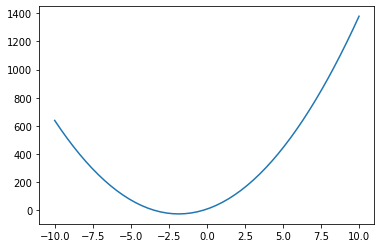

In [141]:
x = np.linspace(-10, 10)
plt.plot(x, func(x))

In [142]:
import random

In [145]:
steps = []

x_optimal = random.choice(x)

In [146]:
x_optimal

5.510204081632654

$$ x = x + (-1) * \frac{\partial{y}}{\partial{x}} \alpha $$

In [148]:
alpha = 1e-4

for i in range(200):
    x_optimal = x_optimal + (-1) * gradient(x_optimal) * alpha
    steps.append(x_optimal)

In [149]:
for s in steps:
    print(s, func(s))

5.363000000000001 495.0486900000002
5.218740000000001 474.44585187600023
5.077365200000001 454.6588861417106
4.938817896000001 435.6554842504987
4.8030415380800004 417.404617074179
4.6699807073184 399.8764842380414
4.539581093172032 383.042465462215
4.411789471308591 366.87507382991123
4.2865536818824195 351.34791090624674
4.163822608244771 336.4356236343594
4.043546156079875 322.11386293843873
3.925675232958278 308.3592439660766
3.8101617282991125 295.14930790502
3.6969584937331303 282.4624853119812
3.586019323858468 270.27806089362673
3.4772989373812986 258.57613968223916
3.3707529586336724 247.33761455082242
3.266337899460999 236.54413501460988
3.164011141471779 226.17807726803133
3.0637309186423436 216.2225154082173
2.965456300269497 206.6611937980519
2.869147174264107 197.47850052364905
2.7747642307788247 188.65944190291253
2.6822689461632483 180.1896180035572
2.591623567239983 172.05519913061636
2.5027910958951836 164.24290324504392
2.4157352739772797 156.73997427654018
2.3304205

## 我们要给中国的省会们设置5个核心能源点

In [152]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [153]:
import re

In [154]:
test_string = "{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},"

In [167]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]") #  

In [168]:
pattern.findall(test_string)

[('乌鲁木齐', '87.68', '43.77')]

In [170]:
city_location = {}

In [171]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    
    if not city_info: continue
        
    city_name, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city_name] = [long, lat]

In [174]:
??re

In [172]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [175]:
import math

## 如何我们要考虑建造能源中心，我们是不是要考虑城市的距离

## 距离

1. 球面地理距离：GeoDistant
2. 余弦距离：Cosine Distance 
3. 欧几里得距离：Euclidean Distance
4. 曼哈顿距离：Manhattan distance 

In [176]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [177]:
geo_distance(city_location['上海'], city_location['杭州'])

163.0760821403945

In [182]:
from pylab import mpl

In [183]:
mpl.rcParams['font.sans-serif'] = 'FangSong'
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [184]:
import networkx as nx

In [185]:
city_graph = nx.Graph()

In [186]:
city_graph.add_nodes_from(list(city_location.keys()))

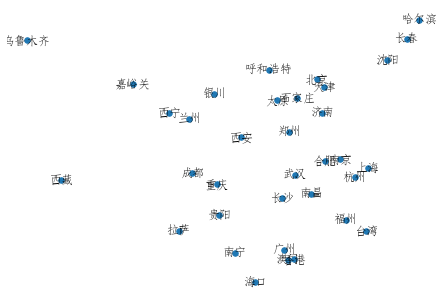

In [187]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [193]:
Xs = np.array(list(city_location.values()))

## FeatureExtractor Finished 

In [195]:
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

## 找到合理的能源中心

In [197]:
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

In [240]:
def get_random_ceneter(all_x, all_y):
    return random.uniform(min(all_x), max(all_x)), random.uniform(min(all_y), max(all_y))

all_x = Xs[:, 0]
all_y = Xs[:, 1]

K = 5
threshold = 3

centers = {'{}'.format(i+1): get_random_ceneter(all_x, all_y) for i in range(K)}

the_first_center = {k: v for k, v in centers.items()}

changed = True

while changed:
    closet_points = defaultdict(list)

    for x, y in zip(all_x, all_y):
        closet_c, closet_dis = min([(k, geo_distance((x, y), centers[k])) for k in centers], key=lambda t:t[1])
        closet_points[closet_c].append([x, y])

    changed = False
    
    for c in closet_points:
        former_center = centers[c] 

        neigbors_belong_to_c = closet_points[c]

        neighbors_center = np.mean(neigbors_belong_to_c, axis=0)

        if geo_distance(neighbors_center, former_center) > threshold:
            print('Updated: {} center'.format(c))
            centers[c] = neighbors_center # 赋值新的中心点
            changed = True

Updated: 5 center
Updated: 1 center
Updated: 3 center
Updated: 2 center
Updated: 4 center
Updated: 1 center
Updated: 3 center
Updated: 2 center
Updated: 3 center
Updated: 2 center
Updated: 3 center
Updated: 2 center
Updated: 5 center
Updated: 3 center
Updated: 2 center


In [241]:
centers

{'1': array([109.266,  25.057]),
 '2': array([118.565  ,  29.46125]),
 '3': array([117.02545455,  39.35272727]),
 '4': array([91.11, 29.97]),
 '5': array([99.518, 38.86 ])}

In [242]:
for x, y in centers.values():
    print(x, y)

109.266 25.057000000000002
118.565 29.46125
117.02545454545456 39.35272727272727
91.11 29.97
99.518 38.86


In [243]:
[[1, 2], [-1, -2]]

[[1, 2], [-1, -2]]

In [244]:
for e in zip([1, 2], [-1,-2]): 
    print(e)

(1, -1)
(2, -2)


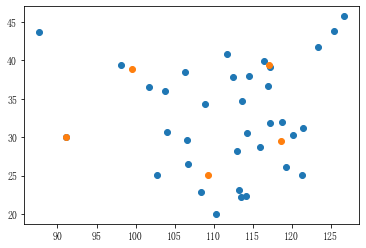

In [245]:
plt.scatter(*[all_x, all_y])
#plt.scatter([x for x, y in centers.values()], [y for x, y in centers.values()])
plt.scatter(*zip(*centers.values()))

In [246]:
city_location_with_station = {
    '能源站-{}'.format(int(i)+1): position for i , position in centers.items()
}

In [247]:
city_location_with_station

{'能源站-2': array([109.266,  25.057]),
 '能源站-3': array([118.565  ,  29.46125]),
 '能源站-4': array([117.02545455,  39.35272727]),
 '能源站-5': array([91.11, 29.97]),
 '能源站-6': array([99.518, 38.86 ])}

In [248]:
def draw_cities(cities, color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph, cities, node_color=color, with_labels=True, node_size=50)

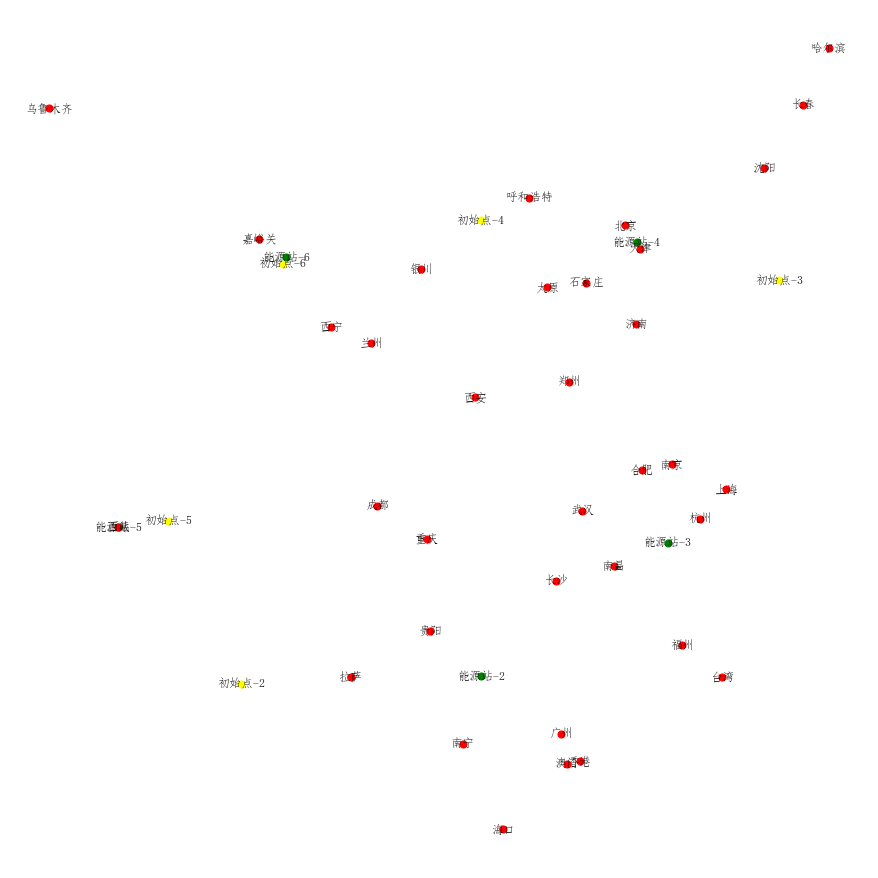

In [249]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初始点-{}'.format(int(i)+1): p for i, p in the_first_center.items()}, color='yellow')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

In [ ]:
clos

In [202]:
centers

{'1': (122.43806023649287, 25.62463833996216),
 '2': (103.62283644970425, 39.37910542722301),
 '3': (113.7970505863809, 41.72458742165483),
 '4': (124.06317765713959, 31.90190529547934),
 '5': (113.43529893379528, 31.87828603460956)}

In [250]:
 from sklearn.cluster import KMeans

In [252]:
 kmeans = KMeans(n_clusters=5, random_state=0).fit(Xs)

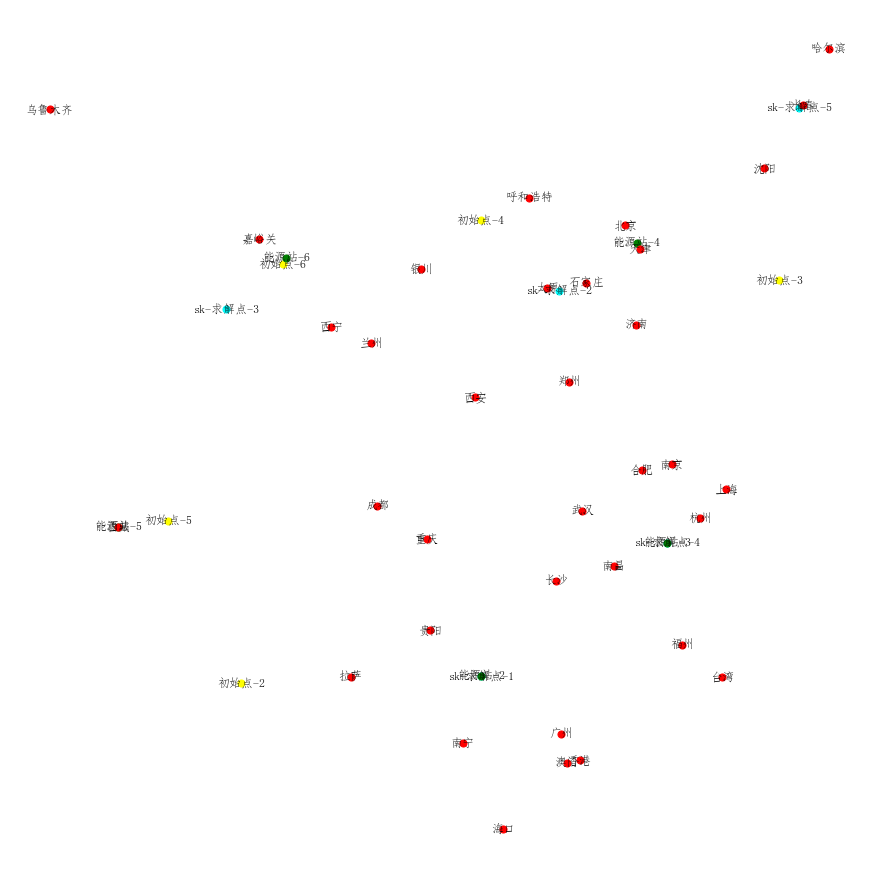

In [257]:
plt.figure(1, figsize=(12, 12))
draw_cities({'初始点-{}'.format(int(i)+1): p for i, p in the_first_center.items()}, color='yellow')
draw_cities({'sk-求解点-{}'.format(int(i)+1): p for i, p in enumerate(kmeans.cluster_centers_)}, color='cyan')
draw_cities(city_location_with_station, color='green')
draw_cities(city_location, color='red')

In [190]:
all_x, all_y

([103.73,
  98.17,
  101.74,
  104.06,
  114.48,
  102.73,
  106.71,
  114.31,
  113.65,
  117.0,
  118.78,
  117.27,
  120.19,
  115.89,
  119.3,
  113.23,
  113.0,
  110.35,
  123.38,
  125.35,
  126.63,
  112.53,
  108.95,
  121.3,
  116.46,
  121.48,
  106.54,
  117.2,
  111.65,
  108.33,
  91.11,
  106.27,
  87.68,
  114.17,
  113.54],
 [36.03,
  39.47,
  36.56,
  30.67,
  38.03,
  25.04,
  26.57,
  30.52,
  34.76,
  36.65,
  32.04,
  31.86,
  30.26,
  28.68,
  26.08,
  23.16,
  28.21,
  20.02,
  41.8,
  43.88,
  45.75,
  37.87,
  34.27,
  25.03,
  39.92,
  31.22,
  29.59,
  39.13,
  40.82,
  22.84,
  29.97,
  38.47,
  43.77,
  22.28,
  22.19])